In [ ]:
# ==========================================
# 1. Configure Kaggle Environment
# ==========================================
import os

os.environ['KAGGLE_USERNAME'] = "dnyaneshwarimodhave"
os.environ['KAGGLE_KEY'] = "5bdec8136a12228ebc48a046b31f3013"

# Download dataset
!kaggle datasets download -d asdasdasasdas/garbage-classification
!unzip -n garbage-classification.zip -d dataset




Streaming output truncated to the last 5000 lines.
  inflating: dataset/Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: dataset/Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: dataset/Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: dataset/Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: dataset/Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: dataset/Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: dataset/Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: dataset/Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: dataset/Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: dataset/Garbage classification/Garbage classification/cardboard/cardboard

In [ ]:
# ==========================================
# 3. Data Preprocessing
# ==========================================
train_dir = "dataset/Garbage classification/Garbage classification"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.2,
    brightness_range=[0.7, 1.3],
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)



Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


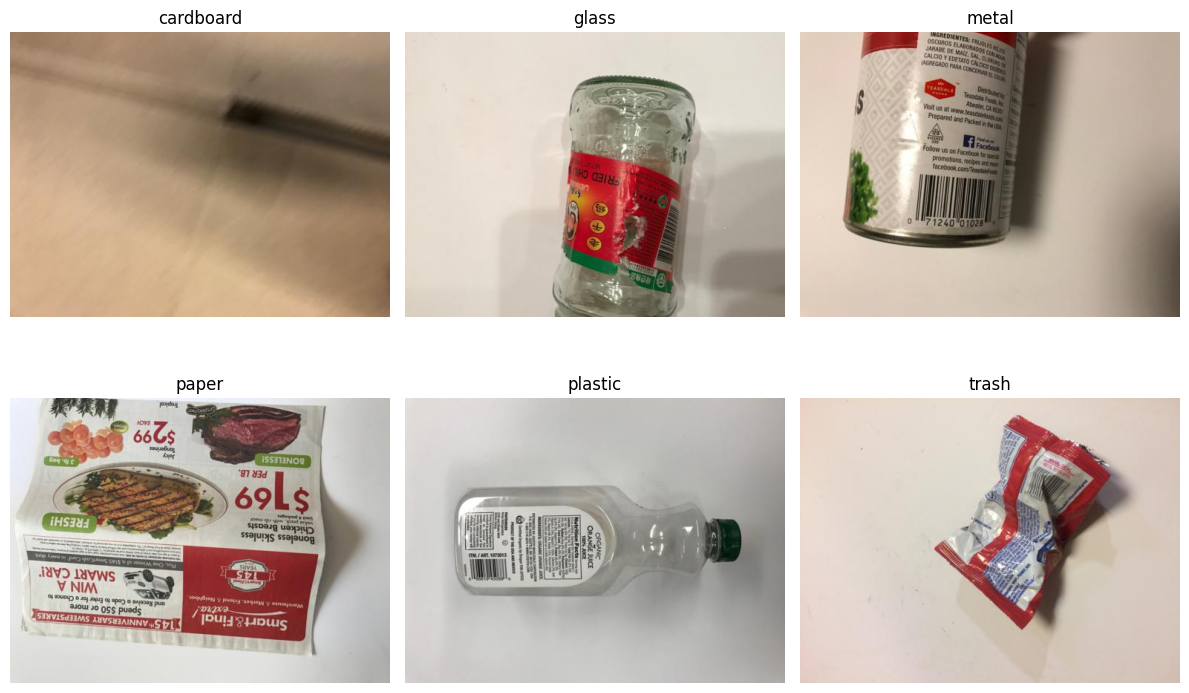

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# dataset path
data_dir = "dataset/garbage classification/Garbage classification"

# Get list of class folders
classes = sorted(os.listdir(data_dir))

plt.figure(figsize=(12, 8))

i = 1
for cls in classes:
    class_path = os.path.join(data_dir, cls)

    if not os.path.isdir(class_path):
        continue

    # Get first image from the class
    sample_image = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, sample_image)

    # Read and display image
    img = mpimg.imread(img_path)

    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
    i += 1

plt.tight_layout()
plt.show()

In [ ]:
# ==========================================
# 2. Import Libraries
# ==========================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2

import numpy as np
import matplotlib.pyplot as plt
import random
import os

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# ==========================================
# 5. EfficientNet Model
# ==========================================
def build_efficientnet(num_classes):
    base = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    base.trainable = False

    x = layers.GlobalAveragePooling2D()(base.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=base.input, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# ==========================================
# 6. MobileNetV2 (🔥 High Accuracy)
# ==========================================
def build_mobilenet(num_classes):
    base = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(224,224,3)
    )
    base.trainable = False   # Freeze layers

    x = layers.GlobalAveragePooling2D()(base.output)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=base.input, outputs=outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# ==========================================
# 7. Select MODEL
# ==========================================
model_choice = "mobilenet"
# Options: "cnn", "efficientnet", "mobilenet"

if model_choice == "cnn":
    print("\n🧠 Using ORIGINAL CNN Model")
    model = build_original_cnn(train_generator.num_classes)

elif model_choice == "efficientnet":
    print("\n🚀 Using EfficientNetB0")
    model = build_efficientnet(train_generator.num_classes)

elif model_choice == "mobilenet":
    print("\n🔥 Using MobileNetV2 (High Accuracy)")
    model = build_mobilenet(train_generator.num_classes)

model.summary()


🔥 Using MobileNetV2 (High Accuracy)
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 329,478 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# ==========================================
# 8. Train Model
# ==========================================
EPOCHS = 12

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5225 - loss: 1.2672 - val_accuracy: 0.6521 - val_loss: 0.8053
Epoch 2/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.7707 - loss: 0.6193 - val_accuracy: 0.7117 - val_loss: 0.7746
Epoch 3/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.8236 - loss: 0.4686 - val_accuracy: 0.6799 - val_loss: 0.8377
Epoch 4/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.8194 - loss: 0.4874 - val_accuracy: 0.7296 - val_loss: 0.7141
Epoch 5/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8583 - loss: 0.3830 - val_accuracy: 0.7316 - val_loss: 0.7480
Epoch 6/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8774 - loss: 0.3342 - val_accuracy: 0.7217 - val_loss: 0.7563
Epoch 7/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8698 - loss: 0.3534 - val_accuracy: 0.7555 - val_loss: 0.7014
Epoch 8/12
64/64 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9079 - loss: 0.2750 - val_accuracy: 0.7555 - v

In [ ]:
# ==========================================
# 9. Evaluate
# ==========================================
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_acc*100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7683 - loss: 0.6928

Validation Accuracy: 75.75%


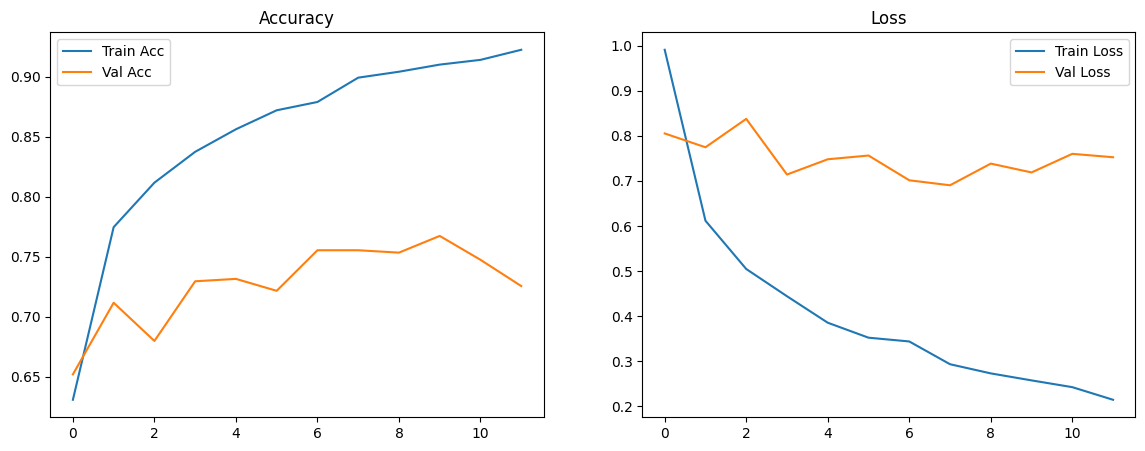

In [ ]:
# ==========================================
# 10. Accuracy Graphs
# ==========================================
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step


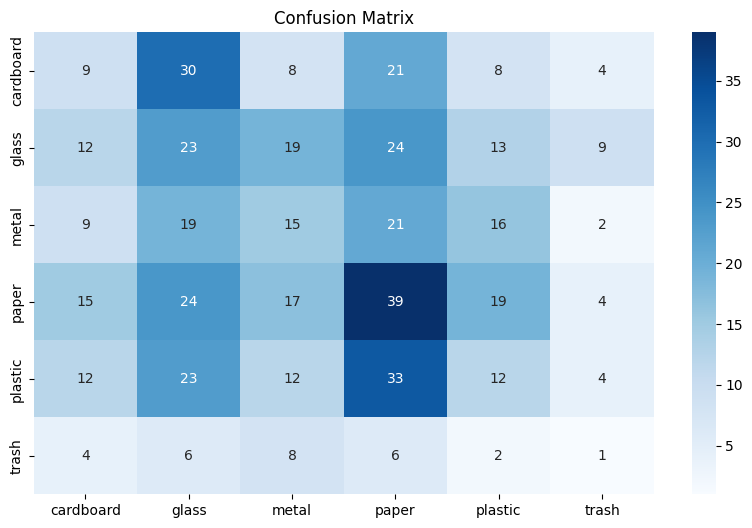

              precision    recall  f1-score   support

   cardboard       0.15      0.11      0.13        80
       glass       0.18      0.23      0.20       100
       metal       0.19      0.18      0.19        82
       paper       0.27      0.33      0.30       118
     plastic       0.17      0.12      0.14        96
       trash       0.04      0.04      0.04        27

    accuracy                           0.20       503
   macro avg       0.17      0.17      0.17       503
weighted avg       0.19      0.20      0.19       503



In [ ]:
# ==========================================
# 11. Confusion Matrix
# ==========================================
val_generator.reset()
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

cm = confusion_matrix(y_true, y_pred)
labels = list(train_generator.class_indices.keys())

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=labels))

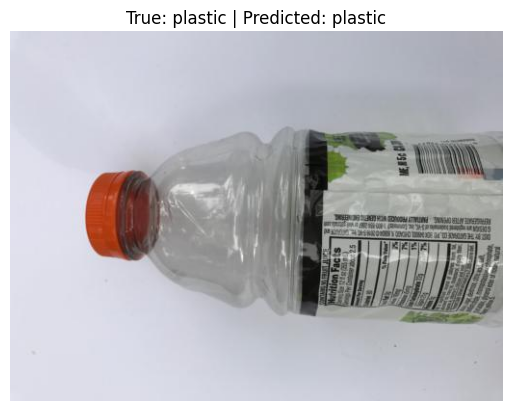

In [ ]:
# ==========================================
# 12. Test on a Random Image
# ==========================================
test_dir = train_dir
all_files = []

for root, dirs, files in os.walk(test_dir):
    for f in files:
        if f.lower().endswith((".jpg",".jpeg",".png")):
            all_files.append(os.path.join(root,f))

sample_path = random.choice(all_files)
true_label = os.path.basename(os.path.dirname(sample_path))

img = load_img(sample_path, target_size=IMG_SIZE)
x = img_to_array(img)/255.0
x = np.expand_dims(x, axis=0)

prediction = model.predict(x, verbose=0)
pred_class = labels[np.argmax(prediction)]

plt.imshow(load_img(sample_path))
plt.title(f"True: {true_label} | Predicted: {pred_class}")
plt.axis("off")
plt.show()

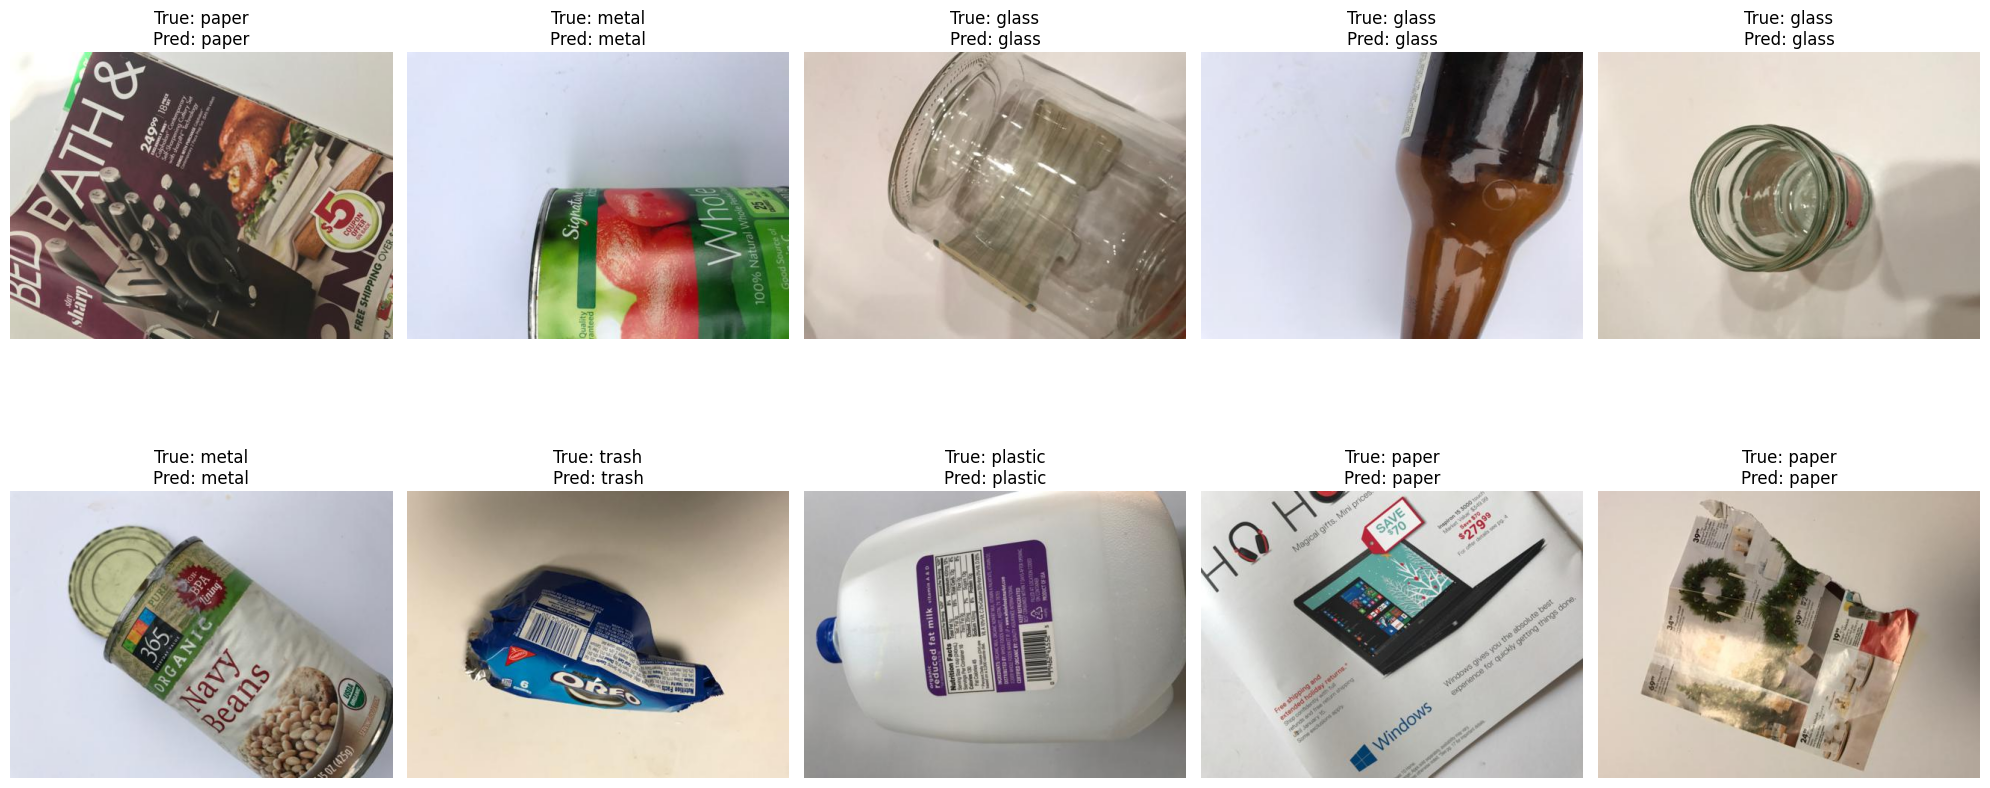

In [ ]:
# ==========================================
# 13. Predict 10 Random Images
# ==========================================
sample_paths = random.sample(all_files, 10)

plt.figure(figsize=(20,10))

for i, path in enumerate(sample_paths):
    true_l = os.path.basename(os.path.dirname(path))

    img = load_img(path, target_size=IMG_SIZE)
    x = img_to_array(img)/255.0
    x = np.expand_dims(x, axis=0)

    pred = model.predict(x, verbose=0)
    pred_label = labels[np.argmax(pred)]

    plt.subplot(2,5,i+1)
    plt.imshow(load_img(path))
    plt.title(f"True: {true_l}\nPred: {pred_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()
